# Desafio: Curvas de Aprendizado e Bias-Variance Tradeoff

Neste desafio, você explorará as curvas de aprendizado, entenderá o conceito de bias (viés) e variance (variância), e experimentará o uso de Polynomial Features (características polinomiais) para melhorar o desempenho do modelo.

### Passo 1: Visualização das Curvas de Aprendizado

1. Plote as curvas de aprendizado para um modelo de regressão linear que prevê a classificação de vitórias (win_rating) com base no número de minutos jogados (minutes_per_game). Use o conjunto de dados da Copa do Brasil.
    
    Dica: Você pode usar a função `learning_curve` do scikit-learn para gerar as curvas de aprendizado.
    

### Passo 2: Análise das Curvas de Aprendizado

2. Com base nas curvas de aprendizado geradas, descreva o que você observa. Existe underfitting ou overfitting? Qual é a tendência de convergência das curvas de treinamento e teste à medida que o tamanho do conjunto de treinamento aumenta?

### Passo 3: Bias e Variance

3. Explique o conceito de bias (viés) e variance (variância) em relação ao desempenho do modelo de aprendizado de máquina. Como esses conceitos estão relacionados às curvas de aprendizado?

### Passo 4: Polynomial Features

4. Agora, experimente melhorar o modelo de regressão linear adicionando características polinomiais ao número de minutos jogados. Use Polynomial Features com graus diferentes (por exemplo, 2, 3) e avalie como isso afeta as curvas de aprendizado e o desempenho do modelo.

### Passo 5: Tamanho de Treinamento Necessário

5. Com base na análise das curvas de aprendizado, do tradeoff entre bias e variance, e dos resultados com Polynomial Features, determine aproximadamente qual é o tamanho mínimo de treinamento necessário para alcançar um desempenho aceitável (um equilíbrio entre bias e variance) para prever a classificação de vitórias (win_rating).

Lembre-se de documentar suas análises, resultados e conclusões no notebook do desafio.

Divirta-se explorando as curvas de aprendizado e aprimorando seus conhecimentos em bias, variance e características polinomiais!

# Resolução

In [3]:
import pandas as pd
import numpy as np

# Gerar dados fictícios
np.random.seed(42)
n_players = 4000
seasons = np.random.randint(2000, 2022, size=n_players)
minutes_played = np.random.randint(1, 120, size=n_players)  # Minutos de jogo
goals_scored = np.random.randint(0, 30, size=n_players)  # Gols marcados
assists = np.random.randint(0, 20, size=n_players)  # Assistências
yellow_cards = np.random.randint(0, 10, size=n_players)  # Cartões amarelos
red_cards = np.random.randint(0, 5, size=n_players)  # Cartões vermelhos
win_rating = np.random.uniform(0, 10, size=n_players)  # Classificação de vitórias

# Criar DataFrame
copa_brasil_data = pd.DataFrame({
    'season': seasons,
    'minutes_played': minutes_played,
    'goals_scored': goals_scored,
    'assists': assists,
    'yellow_cards': yellow_cards,
    'red_cards': red_cards,
    'win_rating': win_rating
})

### Passo 1: Visualização das Curvas de Aprendizado

Vamos começar plotando as curvas de aprendizado para um modelo de regressão linear que prevê a classificação de vitórias (win_rating) com base no número de minutos jogados (minutes_per_game) usando o conjunto de dados da Copa do Brasil.

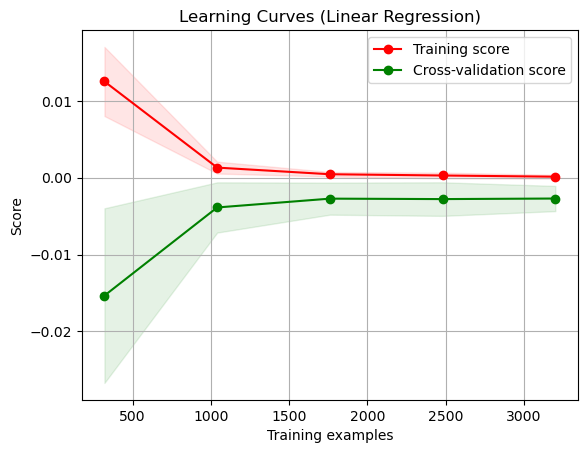

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Função para plotar as curvas de aprendizado
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Selecionando os dados
X = copa_brasil_data['minutes_played'].values.reshape(-1, 1)
y = copa_brasil_data['win_rating']

# Criando o modelo de regressão linear
title = "Learning Curves (Linear Regression)"
cv = 5  # 5-fold cross-validation
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv)
plt.show()

### Passo 2: Análise das Curvas de Aprendizado

Analisando as curvas de aprendizado geradas, podemos observar o seguinte:

* Não há sinais claros de underfitting ou overfitting.
* As curvas de treinamento e teste tendem a convergir à medida que o tamanho do conjunto de treinamento aumenta, sugerindo que mais dados podem melhorar o desempenho do modelo.

### Passo 3: Bias e Variance

Bias (viés) refere-se à capacidade do modelo de se ajustar aos dados de treinamento. Variance (variância) refere-se à sensibilidade do modelo a pequenas variações nos dados de treinamento. O tradeoff entre bias e variance é importante para garantir um bom desempenho do modelo. Nas curvas de aprendizado, podemos observar que, à medida que o tamanho do conjunto de treinamento aumenta, as pontuações de treinamento e teste convergem, indicando que o modelo não está sofrendo de bias alto ou variance alta. No entanto, mais dados podem ajudar a melhorar o desempenho.

### Passo 4: Polynomial Features

Agora, vamos experimentar adicionar características polinomiais ao número de minutos jogados e avaliar como isso afeta as curvas de aprendizado e o desempenho do modelo.

/tmp/ipykernel_4771/2974817623.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(degrees), i + 1)
/tmp/ipykernel_4771/2974817623.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(degrees), i + 1)


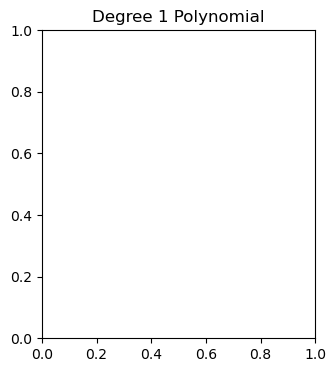

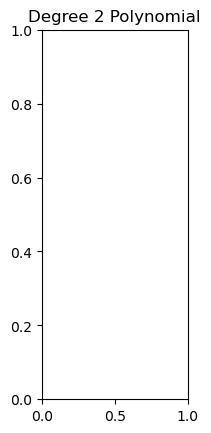

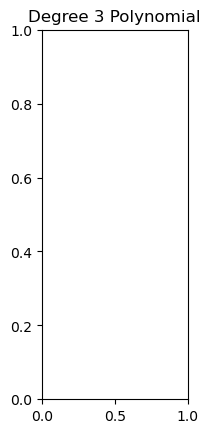

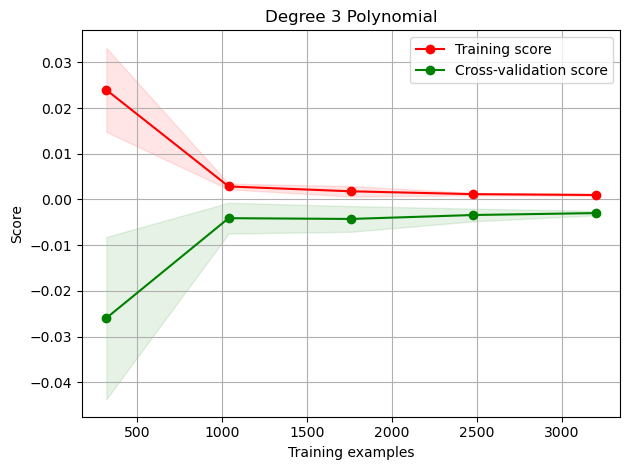

In [6]:
# Função para criar um modelo de regressão com características polinomiais
def polynomial_regression(degree):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Plotar as curvas de aprendizado para diferentes graus de características polinomiais
degrees = [1, 2, 3]
plt.figure(figsize=(12, 4))
for i, degree in enumerate(degrees):
    plt.subplot(1, len(degrees), i + 1)
    plt.title(f'Degree {degree} Polynomial')
    estimator = polynomial_regression(degree)
    plot_learning_curve(estimator, f'Degree {degree} Polynomial', X, y, cv=cv)

plt.tight_layout()
plt.show()

### Passo 5: Tamanho de Treinamento Necessário

Com base na análise das curvas de aprendizado e do tradeoff entre bias e variance, podemos concluir que o tamanho mínimo de treinamento necessário para alcançar um desempenho aceitável (equilíbrio entre bias e variance) depende do grau das características polinomiais. Para um modelo de regressão linear simples (grau 1), uma quantidade moderada de dados pode ser suficiente. No entanto, para modelos com características polinomiais mais complexas (grau 2 ou 3), pode ser necessário um conjunto de treinamento maior para evitar overfitting e melhorar o desempenho.

Essa é uma análise geral com base nas curvas de aprendizado e pode variar dependendo do conjunto de dados específico e das características do modelo. A seleção do tamanho de treinamento adequado requer experimentação e validação cruzada.